This script was used to do the DGE analysis and the selection of the SASP factors. 
1. DGE
2. Overlap of DGE and inflammatory genes
3. Dynamics analysis and selection of the SASP compounds 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
import numpy as np
import scanpy as sc
import scanpy.external as se
from anndata import *
import matplotlib.cm as cm
sc.logging.print_versions()

-----
anndata     0.9.2
scanpy      1.9.5
-----
PIL                 9.4.0
asttokens           NA
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
bottleneck          1.3.5
colorama            0.4.6
comm                0.1.2
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.1
executing           0.8.3
h5py                3.9.0
hypergeom_ufunc     NA
igraph              0.10.8
invgauss_ufunc      NA
ipykernel           6.25.2
jedi                0.18.1
joblib              1.2.0
kiwisolver          1.4.4
llvmlite            0.40.1
louvain             0.8.1
matplotlib          3.7.2
mkl                 2.4.0
mpl_toolkits        NA
natsort             8.4.0
nbinom_ufunc        NA
ncf_ufunc           NA
nct_ufunc           NA
ncx2_ufunc          NA
numba               0.57.1
numexpr             2.8.4
numpy               1.24.3
packaging           23.1
pandas              2.0.3
parso            

In [3]:
data_path = 'C:/Users/Helene/Documents/Master_Thesis/TabulaMurisSenis/Data/droplet_liver_angela.h5ad' # Liver_droplet
adata = read_h5ad(data_path)

In [4]:
# change the index of the adata object
adata.var = adata.var.set_index('feature_name')
tempAdata = adata.raw.to_adata()
tempAdata.var_names = adata.var_names
adata.raw = tempAdata

# exclude first time point
adata = adata[adata.obs['age'] != '1m']

c:\Users\Helene\miniconda3\envs\single_cell_lab\Lib\site-packages\anndata\_core\anndata.py:788: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['Rsrc2', 'Tmem121', 'Ube3b', 'Rnf167', 'Snx13']

    Inferred to be: categorical

  value_idx = self._prep_dim_index(value.index, attr)
c:\Users\Helene\miniconda3\envs\single_cell_lab\Lib\site-packages\anndata\_core\anndata.py:887: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['Rsrc2', 'Tmem121', 'Ube3b', 'Rnf167', 'Snx13']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "var")


1. DGE

In [5]:
subset = adata[((adata.obs['age'] == '3m') | (adata.obs['age'] == '30m'))]
sc.tl.rank_genes_groups(subset,groupby='age', key_added ='dge', method='wilcoxon', reference= '3m')
#subset.uns['dge']['names'] = subset.var_names

dge_name_frame = pd.DataFrame(subset.uns['dge']['names'])
dge_name_frame = dge_name_frame.rename(columns={'30m': 'gene_names'})

dge_score_frame = pd.DataFrame(subset.uns['dge']['scores'])
dge_score_frame = dge_score_frame.rename(columns={'30m': 'scores'})

dge_fused_frame = pd.concat([dge_name_frame, dge_score_frame], axis=1)
#dge_result_frame = dge_fused_frame[dge_fused_frame['p_value_corr'] <= 0.05]
dge_fused_frame[:10]

c:\Users\Helene\miniconda3\envs\single_cell_lab\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


,gene_names,scores
0,Tmsb4x,45.623207
1,Cd74,44.570450
2,Sh3bgrl3,44.462700
3,Tmsb10,44.401218
4,Cyba,44.229362
5,H2-D1,44.063190
6,Rbm3,43.914185
7,H2-Ab1,43.687416
8,Srgn,43.591579
9,Arpc1b,43.487572


2. Overlap of DGE and inflammatory genes

In [6]:
# human genes associated with inflammation
inflammation_raw = " AGER C8B CCR7 CXCL6 HLA-DRA IL15 IL9 MAP3K5 MX2 PRKCB SMAD7 TOLLIP ALOX12 C9 CD163 CXCL9 HLA-DRB1 IL17A IRF1 MAP3K7 MYC PTGDR2 STAT1 TRADD ALOX15 CCL11 CD4 CXCR1 HMGB1 IL18 IRF3 MAP3K9 MYD88 PTGER1 STAT2 TRAF2 ALOX5 CCL13 CD40 CXCR2 HMGB2 IL18RAP IRF5 MAPK1 MYL2 PTGER2 STAT3 TREM2 AREG CCL16 CD40LG CXCR4 HMGN1 IL1A IRF7 MAPK14 NFATC3 PTGER3 TBXA2R TSLP ARG1 CCL17 CD55 CYSLTR1 HRAS IL1B ITGB2 MAPK3 NFE2L2 PTGER4 TCF4 TWIST2 ATF2 CCL19 CD86 CYSLTR2 HSH2D IL1R1 JUN MAPK8 NFKB1 PTGFR TGFB1 TYROBP BCL2L1 CCL2 CDC42 DAXX HSPB1 IL1RAP KEAP1 MAPKAPK2 NLRP3 PTGIR TGFB2 BCL6 CCL20 CEBPB DDIT3 HSPB2 IL1RN KNG1 MAPKAPK5 NOD1 PTGS1 TGFB3 BIRC2 CCL21 CFB DEFA1 IFI44 IL2 LIMK1 MASP1 NOD2 PTGS2 TGFBR1 C1QA CCL22 CFD ELK1 IFIT1 IL21 LTA MASP2 NOS2 PTK2 TLR1 C1QB CCL23 CFL1 FASLG IFIT2 IL22 LTB MAX NOX1 RAC1 TLR2 C1R CCL24 CREB1 FLT1 IFIT3 IL22RA2 LTB4R MBL2 NR3C1 RAF1 TLR3 C1S CCL3 CRP FOS IFNA1 IL23A LTB4R2 MEF2A OAS2 RAPGEF2 TLR4 C2 CCL4 CSF1 FXYD2 IFNB1 IL23R LY96 MEF2BNB MEF2B OASL RELA TLR5 C3 CCL5 CSF2 GNAQ IFNG IL3 MAFF MEF2C OXER1 RELB TLR6 C3AR1 CCL7 CSF3 GNAS IL10 IL4 MAFG MEF2D PDGFA RHOA TLR7 C4A CCL8 CXCL1 GNB1 IL10RB IL5 MAFK MKNK1 PIK3C2G RIPK1 TLR8 C5 CCR1 CXCL10 GNGT1 IL11 IL6 MAP2K1 MMP3 PLA2G4A RIPK2 TLR9 C6 CCR2 CXCL2 GRB2 IL12A IL6R MAP2K4 MMP9 PLCB1 ROCK2 TNF C7 CCR3 CXCL3 HDAC4 IL12B IL7 MAP2K6 MRC1 PPP1R12B RPS6KA5 TNFAIP3 C8A CCR4 CXCL5 HIF1A IL13 IL8 MAP3K1 MX1 PRKCA SHC1 TNFSF1"
inflammation_list = inflammation_raw.split()
inflammation_genes = [gene.capitalize() for gene in inflammation_list]

In [7]:
# overlap
for gene in inflammation_genes:
    if gene in dge_fused_frame['gene_names'].iloc[300:400].values:
        print("upregulated: ",dge_fused_frame[dge_fused_frame['gene_names'] == gene])

upregulated:      gene_names    scores
338      Hmgb2  34.68634
upregulated:      gene_names     scores
320       Irf5  34.999069
upregulated:      gene_names     scores
347      Trem2  34.439304
upregulated:      gene_names     scores
392       Ccl2  33.584473
upregulated:      gene_names     scores
395       Ccl3  33.539257
upregulated:      gene_names     scores
356       Gnb1  34.279736
upregulated:      gene_names     scores
346     Il10rb  34.519737
upregulated:      gene_names     scores
386      Cxcl2  33.687752


In [8]:
# select DGE genes
all_cells = adata
marker_list = [ 'Irf5', 'Trem2', 'Irf7', 'Itgb2', 'Ccl2', 'Cdc42', 'Ccl5', 'Cxcl2', 'Il1b' , 'Tgfb1' , 'Ccl4' , 'Tyrobp', 'C1qa', 'C1qb', 'Cfl1' ] # old data
marker_list = [ 'Cxcl2', 'Il10rb', 'Gnb1', 'Ccl3', 'Ccl2', 'Trem2', 'Irf5', 'Hmgb2', 'Grb2' , 'Rhoa' , 'Gnas' , 'Ccl5', 'Fos', 'Rac1', 'Itgb2', 'Irf7', 'Il1b', 'Tgfb1', 'Cdc42', 'C1qa', 'C1qb', 'Ccl4', 'Tyrobp', 'Cfl1'  ] # new data
marker_dict = {index: item for index, item in enumerate(marker_list)}


3. Dynamics analysis and selection of the SASP compounds 

In [28]:
# all top differentially expressed genes
marker_list = [ 'Cxcl2', 'Il10rb', 'Gnb1', 'Ccl3', 'Ccl2', 'Trem2', 'Irf5', 'Hmgb2', 'Grb2' , 'Rhoa' , 'Gnas' , 'Ccl5', 'Fos', 'Rac1', 'Itgb2', 'Irf7', 'Il1b', 'Tgfb1', 'Cdc42', 'C1qa', 'C1qb', 'Ccl4', 'Tyrobp', 'Cfl1'  ] 

# bad dynamics
gene_names = [ 'Irf7', 'Cdc42',  'Tyrobp', 'C1qa', 'C1qb', 'Cfl1', 'Rhoa' , 'Gnas' ,'Fos', 'Rac1', 'Gnb1',  'Tgfb1', 'Itgb2', 'Il1b' ]

# dynamics make sense
gene_names = [ 'Cxcl2', 'Il10rb',  'Ccl3', 'Ccl2', 'Irf5', 'Trem2', 'Ccl4', 'Hmgb2' ]

# NF-kB targets
gene_names = ['Ccl2', 'Ccl3', 'Ccl4', 'Cxcl2' ]

In [32]:
# cytokines rising in general from KEGG pathway map
gene_names = [ 'Ccl2', 'Ccl3',  'Ccl4', 'Ccl5','Ccl6', 'Ccl7', 'Ccl8',  'Ccl12','Ccl24','Cxcl2','Cxcl9', 'Cxcl10',  'Cxcl13',  'Cxcl16',  'Il15']

# cytokines showing good dynamics from pathway map
gene_names = [ 'Ccl2', 'Ccl3',  'Ccl4', 'Ccl7', 'Ccl8',  'Ccl12', 'Ccl24', 'Cxcl2' , 'Cxcl9', 'Cxcl10',  'Cxcl13', 'Il15'] 

# cytokines targeted by NF-kB from pathway map
gene_names = [ 'Ccl2', 'Ccl3',  'Ccl4', 'Cxcl2', 'Cxcl10',  'Cxcl13']


In [34]:
# combination of KEGG and DGE
gene_names = [ 'Ccl2', 'Ccl3',  'Ccl4', 'Cxcl2', 'Cxcl10',  'Cxcl13']

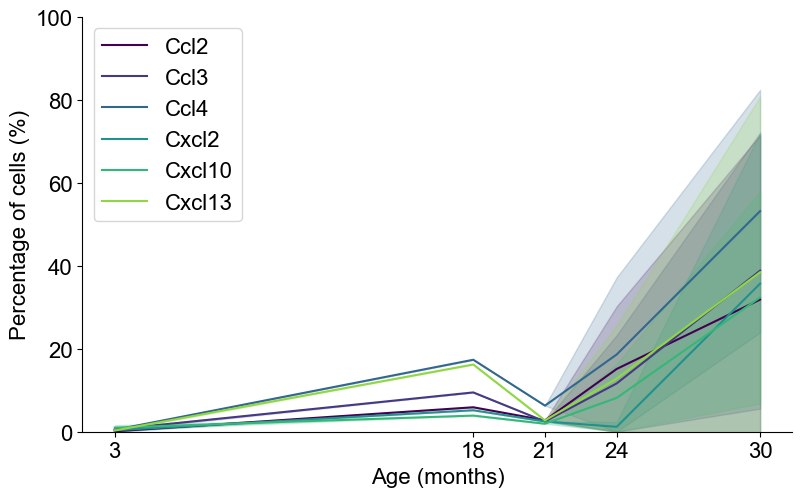

In [36]:
# ploting
fig, ax = plt.subplots(figsize=(8, 5))
colormap = cm.viridis
colorcount = 0
n = len(gene_names)

mouse_list = adata.obs['donor_id'].unique().tolist()
genes_per_age = pd.DataFrame(columns = ['Numeric_time'])
genes_per_mouse = pd.DataFrame(columns = ['Numeric_time'])
        
# selecting gene in dataset 
for gene_of_interest in gene_names:
    
    # extract numeric timepoints
    all_timepoints = adata.obs['age'].unique()
    timepoints_string = [str(timepoint) for timepoint in all_timepoints]
    timepoints_integer = [int(timepoint.split('m')[0]) for timepoint in timepoints_string]
    timepoints_sorted = [x for _, x in sorted(zip(timepoints_integer, all_timepoints))]

    adata_gene = adata[:, adata.var_names == gene_of_interest]
    expression_per_timepoint = pd.DataFrame(columns=['Gene', 'Timepoint', 'Numeric_time' ])
    
    # select timrpoint
    for timepoint in timepoints_sorted:
        adata_timepoint = adata_gene[adata_gene.obs['age'] == timepoint]
        expression_per_mouse =  pd.DataFrame(columns = ['Gene',  'Timepoint', 'Numeric_time' ])
        
        # select mouse
        for mouse in mouse_list:
            adata_mouse = adata_timepoint[adata_timepoint.obs['donor_id'] == mouse]    
            
            # make dataframe with gene expressions    
            expression_per_mouse.loc[0, 'Gene'] = gene_of_interest
            expression_per_mouse.loc[0, 'Timepoint'] = timepoint 
            expression_per_mouse['Numeric_time'] = expression_per_mouse['Timepoint'].str.split('m').str[0].astype(float)
            # calculate number of cells expressing the gene 
            expression_per_mouse[mouse] = (adata_mouse.X > 0).sum()
            # calculate total cells per mouse
            total_per_mouse = len(adata[adata.obs['donor_id'] == mouse])
            
            # calculate percentage of cells expressing the gene for cases with gene expression not 0
            if str(mouse).split('-')[0] == str(timepoint).split('m')[0] and expression_per_mouse[mouse].values[0] == 0:
                expression_per_mouse[mouse] = 0
            elif expression_per_mouse[mouse].values[0] == 0:
                    expression_per_mouse[mouse] = np.nan
            else: 
                expression_per_mouse[mouse] = expression_per_mouse[mouse] * 100 / total_per_mouse 

        # calculate mean for every timepoint (for case where there is more than 1 mouse)
        expression_per_mouse['Mean'] = expression_per_mouse.iloc[:, 3:].mean(axis=1)
        expression_per_mouse['Std'] = expression_per_mouse.iloc[:, 3:].std(axis=1)
        expression_per_timepoint = pd.concat([expression_per_timepoint, expression_per_mouse], ignore_index=True)
   
# plot resluts
    gene_data = expression_per_timepoint[expression_per_timepoint['Gene'] == gene_of_interest]
    x = gene_data['Numeric_time']
    y = gene_data['Mean']
    std = gene_data['Std']
    if colorcount <= n:
        colors = [colormap(colorcount / n) for colorcount in range(n)] 
        plt.plot(x, y, linestyle='-', label=gene_of_interest, color=colors[colorcount])
        plt.fill_between(x, y - std, y + std, alpha=0.2, color=colors[colorcount])
        colorcount += 1


plt.xticks([3, 18, 21, 24, 30], fontsize=16, fontfamily='arial')
plt.yticks(fontsize=16, fontfamily='arial')
plt.xlabel('Age (months)', fontsize=16, fontfamily='arial')
plt.ylabel('Percentage of cells (%)', fontsize=16, fontfamily='arial')
plt.legend(loc= 'upper left', bbox_to_anchor=(1, 1), fontsize=16, prop={'family': 'arial', 'size': 16})
plt.tight_layout()
ax = plt.gca() 
ax.set_ylim([0, 100])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
